# Importing libraries

In [1]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------
pd.options.display.max_colwidth = None

# Path configuration for custom module imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')

# Ignore warnings  
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Clusters and metrics
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer

# Clustering models
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Custom functions and classes
# -----------------------------------------------------------------------
from src.support_preprocess import preprocess
from src.support_eda import plot_relation_tv
from src.support_clustering import *

# Data loading and preprocess

In [3]:
df = pd.read_csv('../data/processed/products.csv', index_col=0)

df.head()

Category Sub-Category  NumberOfCustomers  TotalSales  \
ProductID                                                                 
FUR-ADV-10000002  Furniture  Furnishings                  2     159.120   
FUR-ADV-10000108  Furniture  Furnishings                  3     350.070   
FUR-ADV-10000183  Furniture  Furnishings                  8     974.832   
FUR-ADV-10000188  Furniture  Furnishings                  5     124.950   
FUR-ADV-10000190  Furniture  Furnishings                  1     222.360   

                  TotalQuantity  TotalProfit  TotalShippingCost  
ProductID                                                        
FUR-ADV-10000002              3       60.390              10.14  
FUR-ADV-10000108              7        3.360              22.90  
FUR-ADV-10000183             31     -651.738             100.02  
FUR-ADV-10000188              7        4.200              16.53  
FUR-ADV-10000190              2      104.460              32.71

### Let’s carry out the preprocessing

* Remove the columns we do not want to consider.

    - In this case, we are not going to remove any columns.

* Select the encoding methods for categorical variables.

    - We only have the categorical variables `Category` and `Sub-Category`. We will perform a Frequency Encoding for both of them.

* Select the scaling method.

    - We will initially try using a RobustScaler due to the significant presence of outliers.

In [9]:
cols = []

encoding_methods = {"frequency": ['Category', 'Sub-Category']}

scaling = 'robust'

df_encoded, df_scaled = preprocess(df, encoding_methods, scaling, columns_drop=cols)

In [10]:
df_encoded.head()

Category  Sub-Category  NumberOfCustomers  TotalSales  \
ProductID                                                                 
FUR-ADV-10000002  0.216479      0.066459                  2     159.120   
FUR-ADV-10000108  0.216479      0.066459                  3     350.070   
FUR-ADV-10000183  0.216479      0.066459                  8     974.832   
FUR-ADV-10000188  0.216479      0.066459                  5     124.950   
FUR-ADV-10000190  0.216479      0.066459                  1     222.360   

                  TotalQuantity  TotalProfit  TotalShippingCost  
ProductID                                                        
FUR-ADV-10000002              3       60.390              10.14  
FUR-ADV-10000108              7        3.360              22.90  
FUR-ADV-10000183             31     -651.738             100.02  
FUR-ADV-10000188              7        4.200              16.53  
FUR-ADV-10000190              2      104.460              32.71

In [11]:
df_scaled.head()

Category  Sub-Category  NumberOfCustomers  TotalSales  \
ProductID                                                                 
FUR-ADV-10000002 -1.044357          0.52               -0.4   -0.251171   
FUR-ADV-10000108 -1.044357          0.52               -0.2   -0.091262   
FUR-ADV-10000183 -1.044357          0.52                0.8    0.431936   
FUR-ADV-10000188 -1.044357          0.52                0.2   -0.279786   
FUR-ADV-10000190 -1.044357          0.52               -0.6   -0.198211   

                  TotalQuantity  TotalProfit  TotalShippingCost  
ProductID                                                        
FUR-ADV-10000002      -0.705882     0.134199          -0.298725  
FUR-ADV-10000108      -0.470588    -0.203325          -0.196204  
FUR-ADV-10000183       0.941176    -4.080435           0.423421  
FUR-ADV-10000188      -0.470588    -0.198354          -0.247384  
FUR-ADV-10000190      -0.764706     0.395021          -0.117385

# Clustering

Vamos a llevar a cabo diferentes algoritmos de clustering para ver cómo se segmentan los clientes.

## K-means

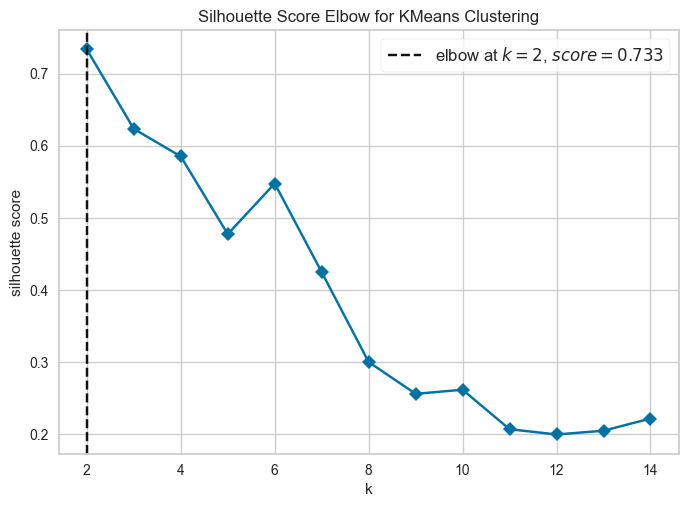

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [12]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=False)
visualizer.fit(df_scaled)
visualizer.show()

In [13]:
model_kmeans = KMeans(n_clusters=2)

km_fit = model_kmeans.fit(df_scaled)
labels = km_fit.labels_

In [14]:
clustering_metrics(df_scaled, labels)

silhouette_score  davies_bouldin_index  cardinality
0          0.730903              0.738907          565
1          0.730903              0.738907         9727

In [15]:
df_kmeans = df_scaled.copy()

df_kmeans['cluster'] = km_fit.labels_

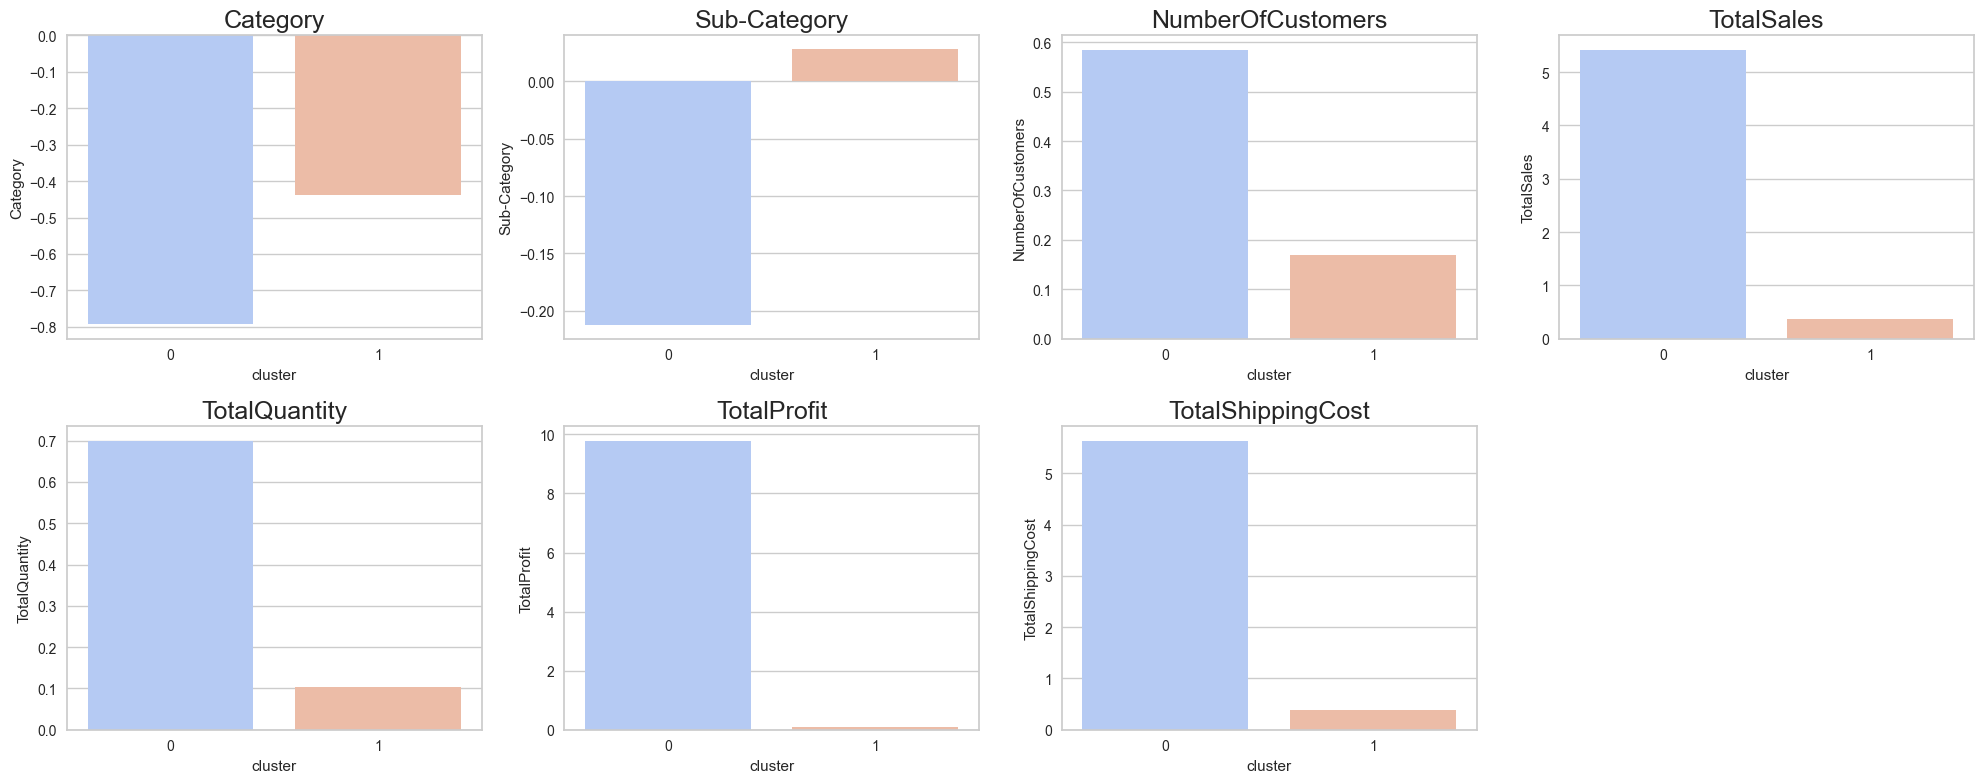

In [16]:
plot_clusters(df_kmeans)

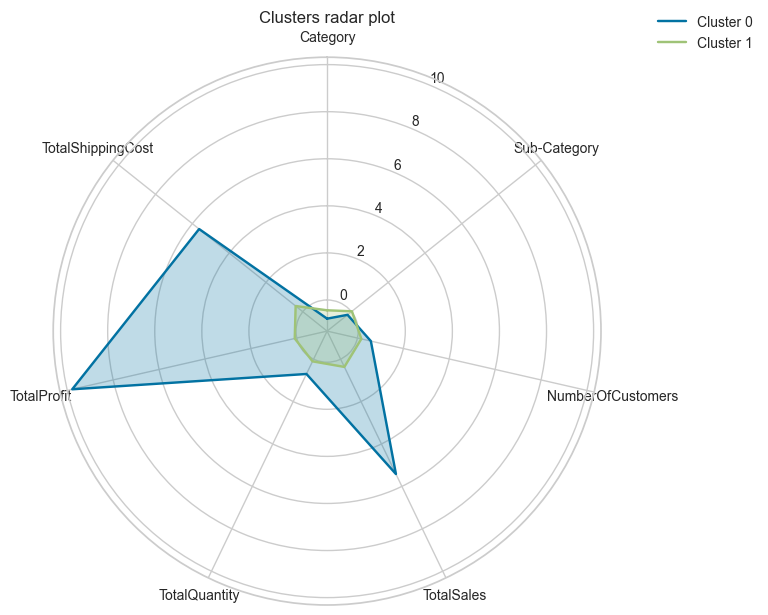

In [19]:
# Select variables to display in radar plot
variables = ['Category', 'Sub-Category', 'NumberOfCustomers', 'TotalSales',
       'TotalQuantity', 'TotalProfit', 'TotalShippingCost']

plot_radar(df_kmeans, variables)

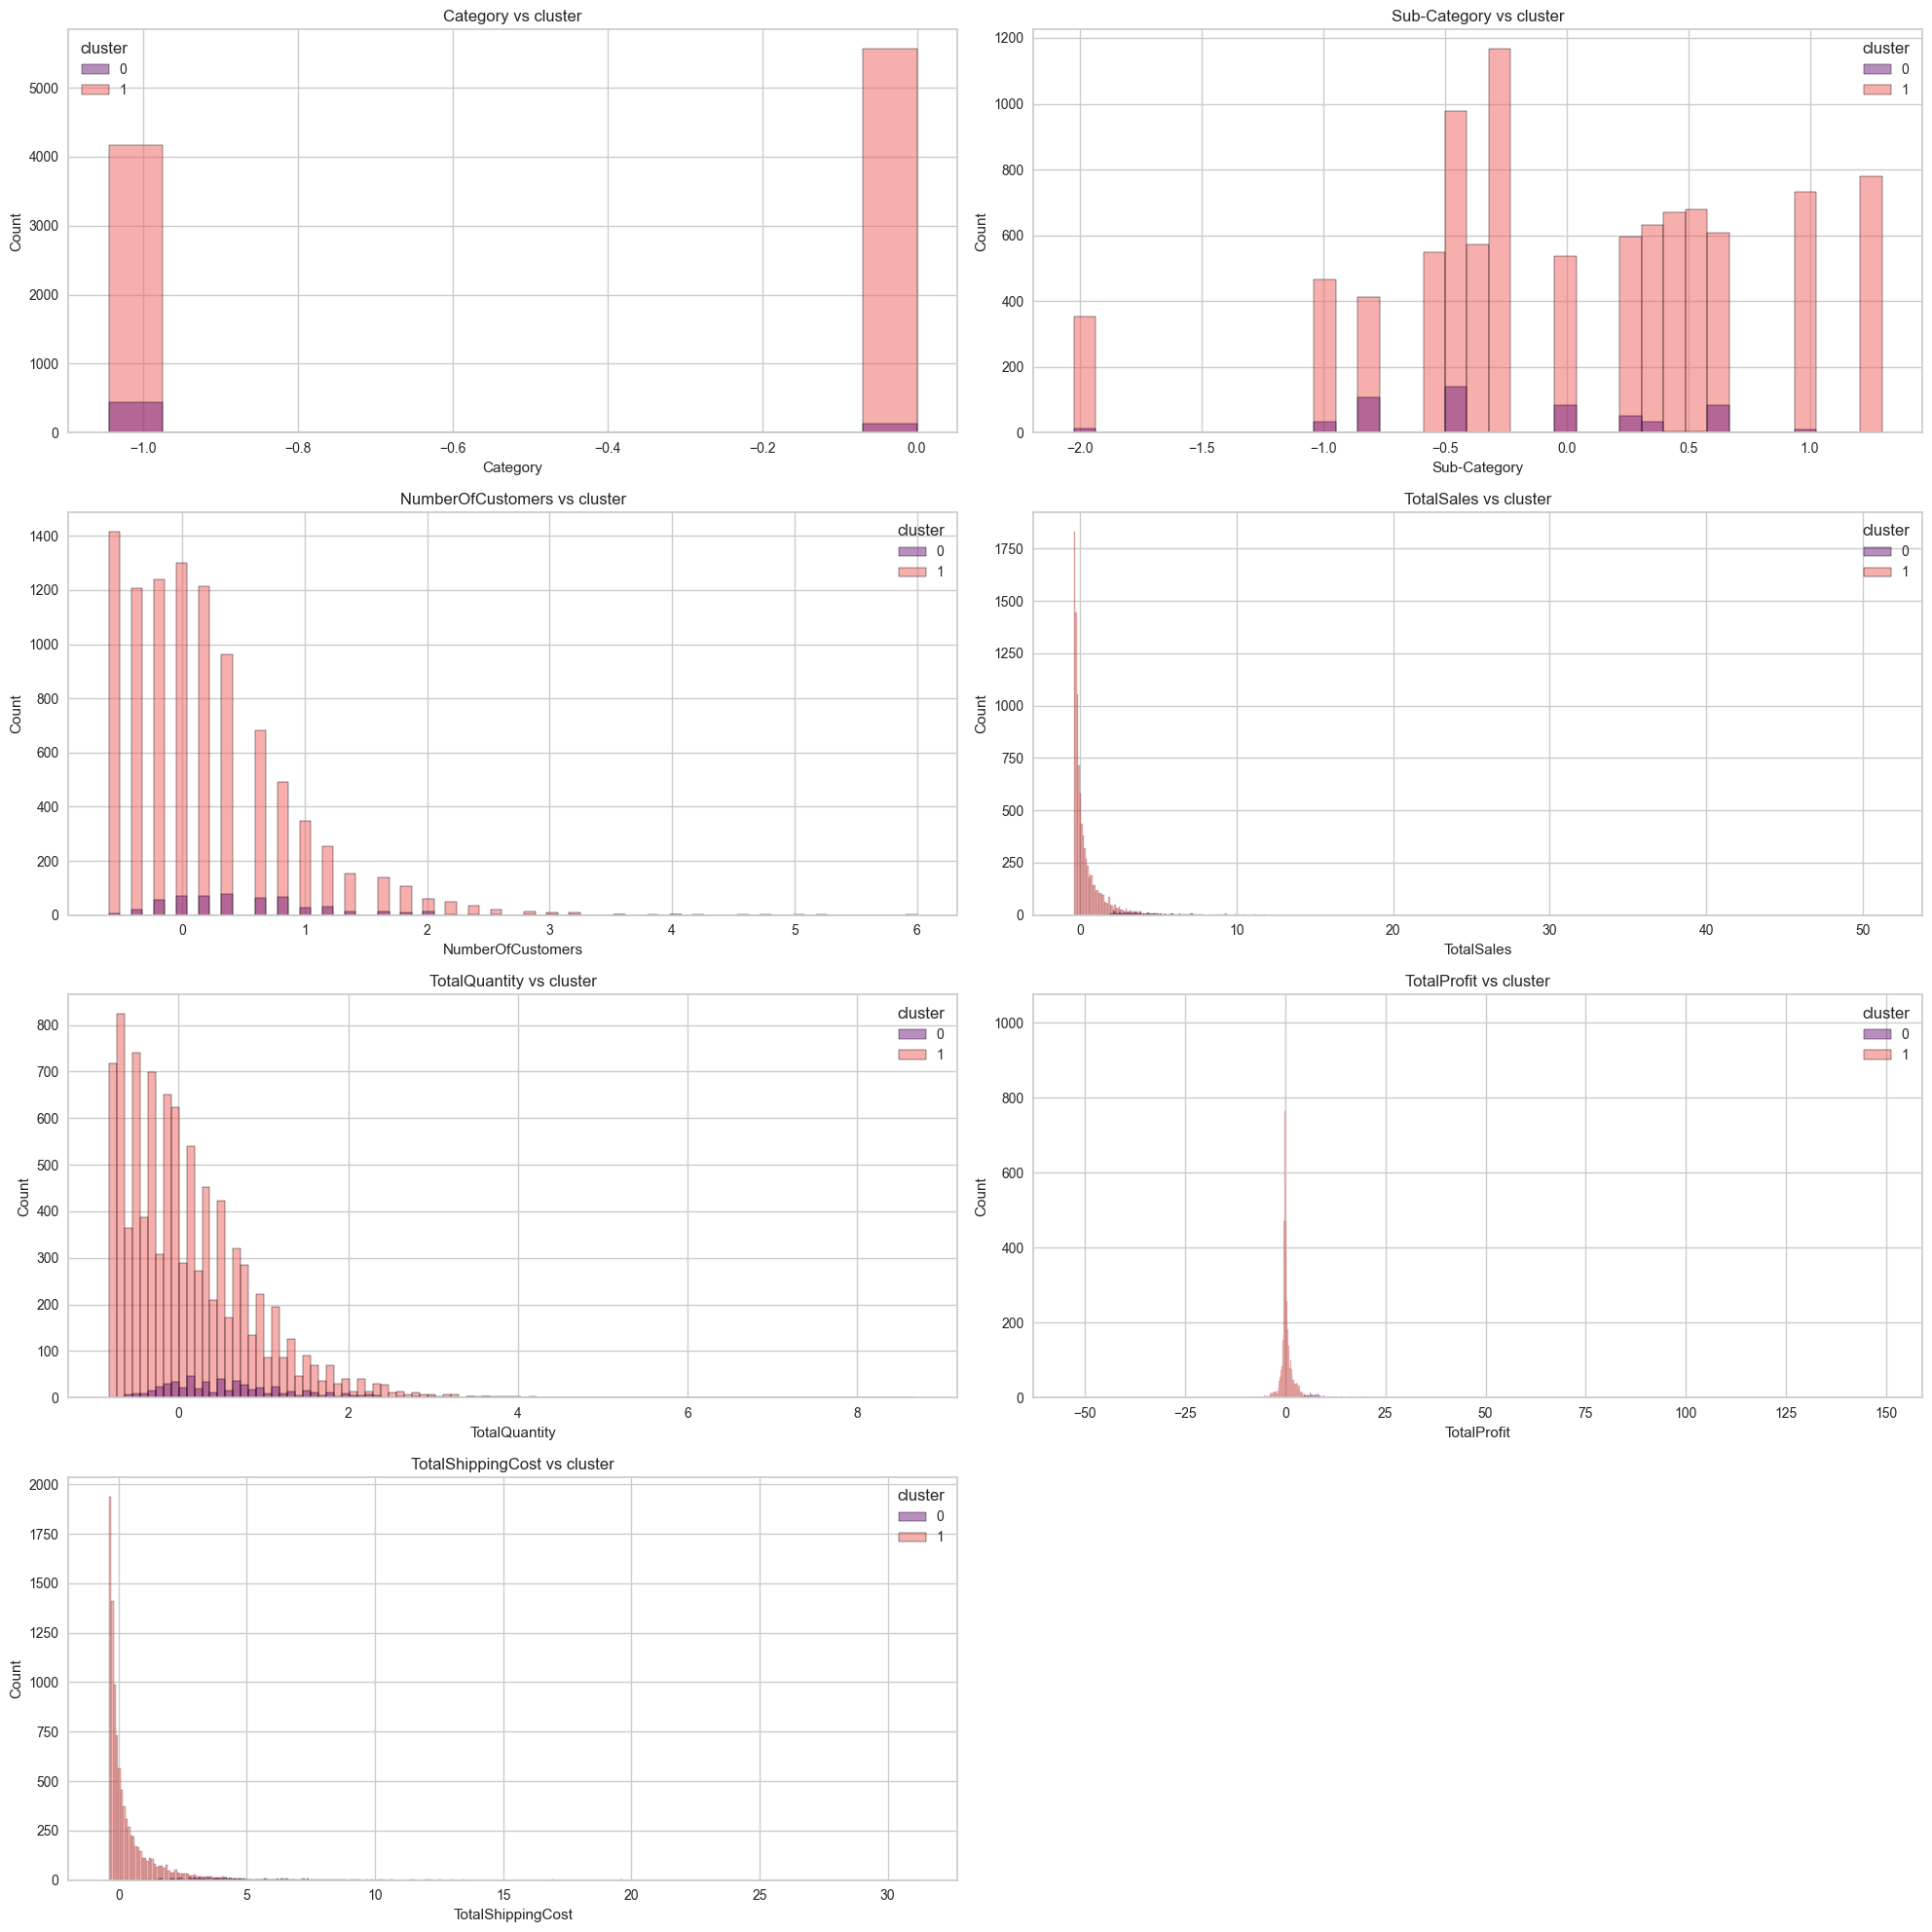

In [20]:
plot_relation_tv(df_kmeans, 'cluster', size=(20, 20), n_cols = 2)

---

## Agglomerative clustering

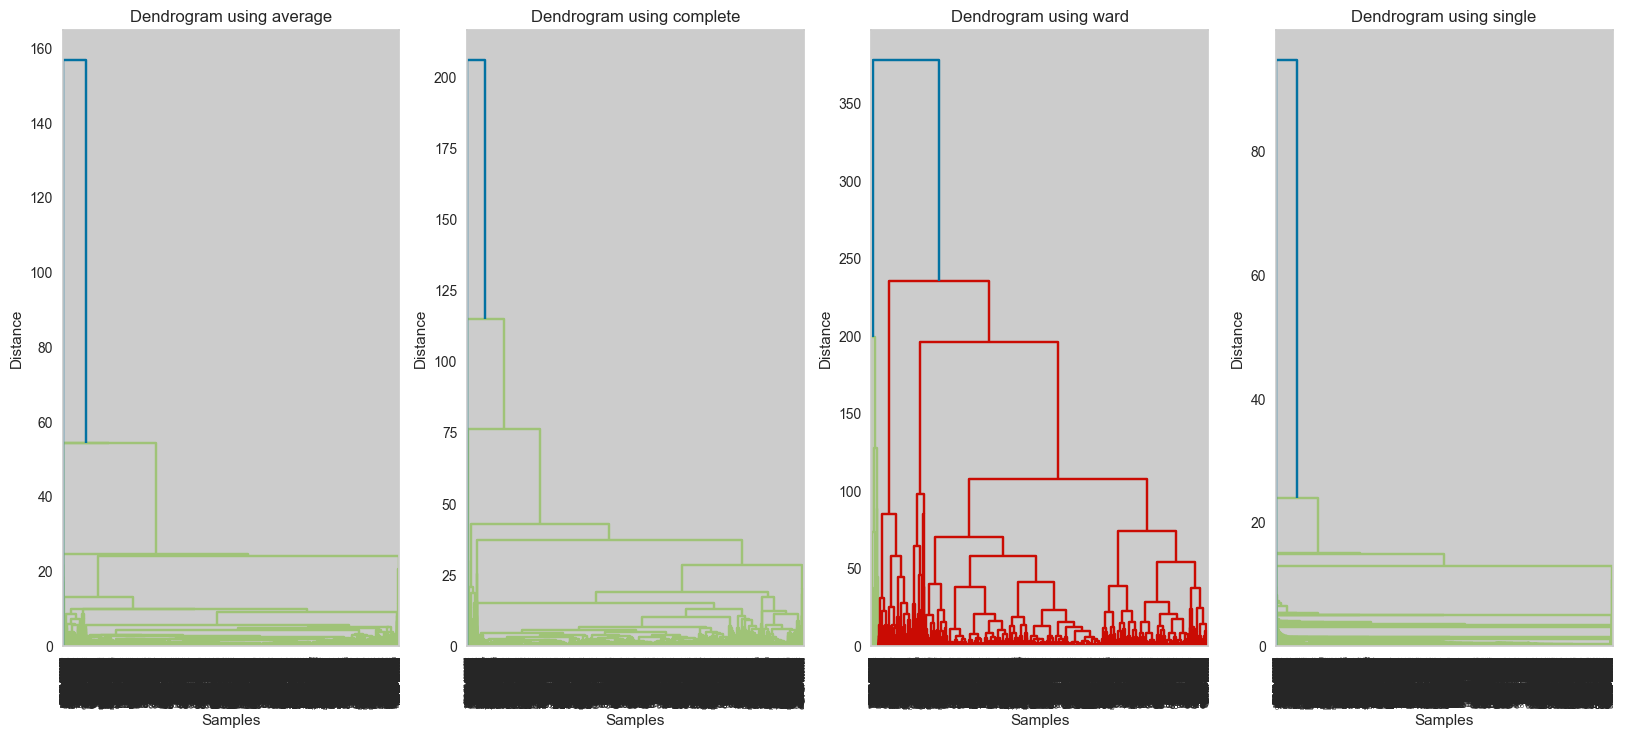

In [21]:
df_copy = df_scaled.copy()

plot_dendrogram(df_copy)

In [22]:
results_df = agglomerative_methods(df_copy)

Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.


In [27]:
best_model = results_df.sort_values(by='ranking_score', ascending=False).iloc[0]

best_model

linkage                                    complete
metric                                       cosine
silhouette_score                            0.34397
davies_bouldin_index                       1.606845
cluster_cardinality     {0: 5524, 1: 2533, 2: 2235}
n_cluster                                         3
balance_score                              2.471588
ranking_score                             -3.734463
Name: 5, dtype: object

In [28]:
model = AgglomerativeClustering(
    linkage=best_model['linkage'],
    metric=best_model['metric'],
    distance_threshold=None,
    n_clusters=best_model['n_cluster']
)

agglo_fit = model.fit(df_scaled)
agglo_labels = agglo_fit.labels_

In [29]:
clustering_metrics(df_scaled, agglo_labels)

silhouette_score  davies_bouldin_index  cardinality
0         -0.036565              1.606845         5524
1         -0.036565              1.606845         2533
2         -0.036565              1.606845         2235

In [30]:
df_agg = df_scaled.copy()
df_agg["cluster"] = agglo_labels

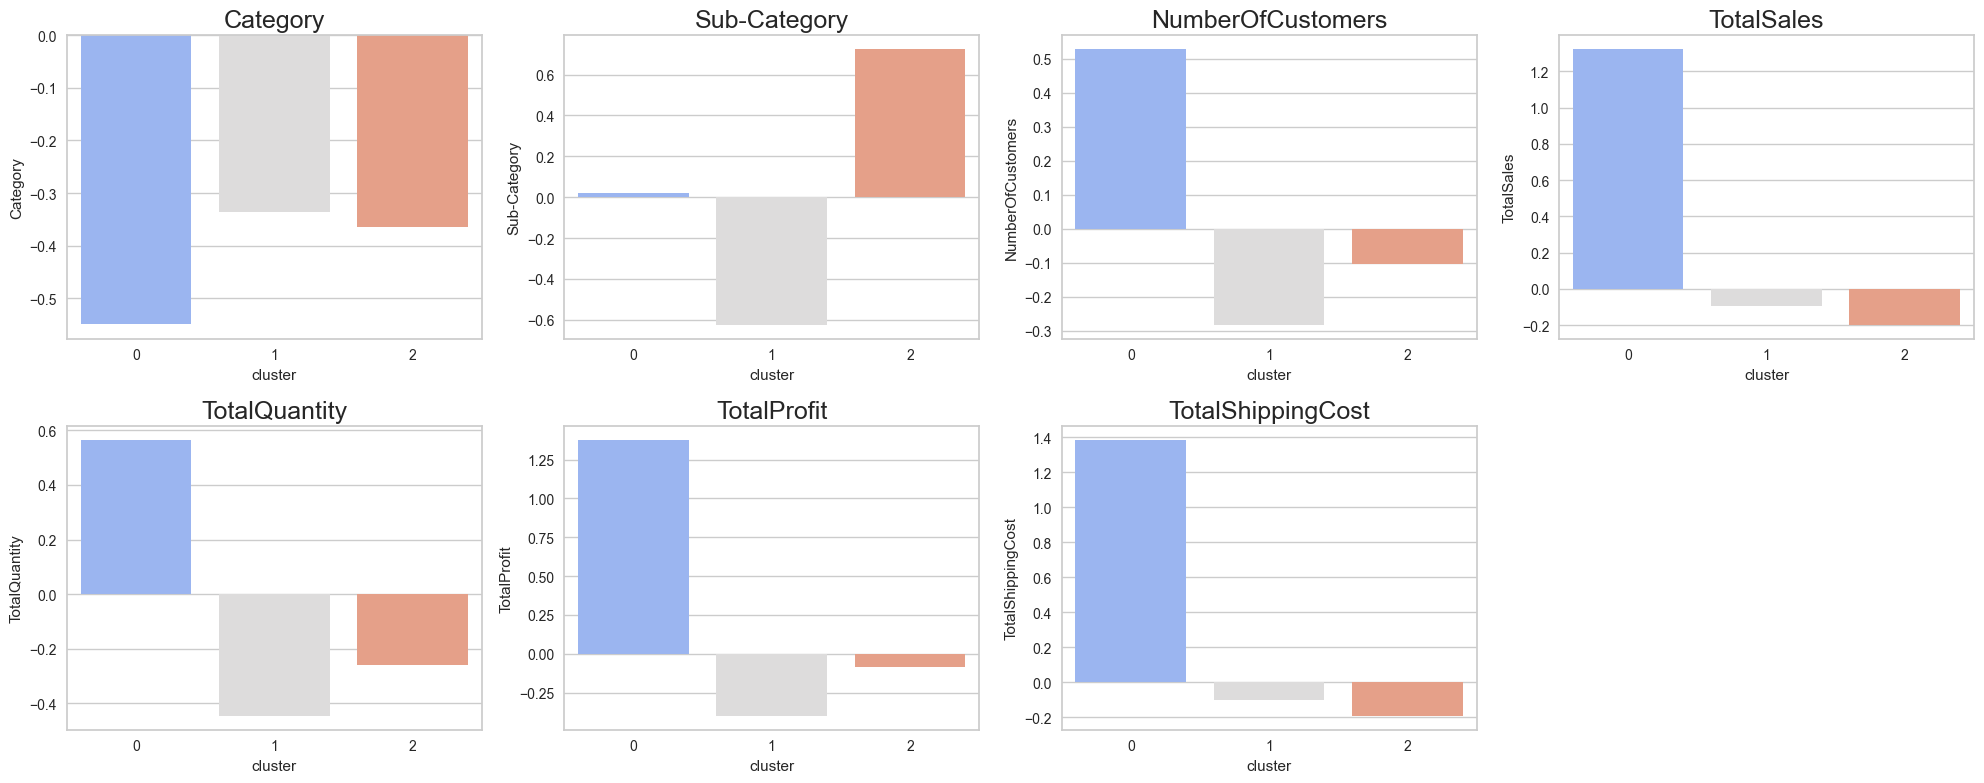

In [31]:
plot_clusters(df_agg)

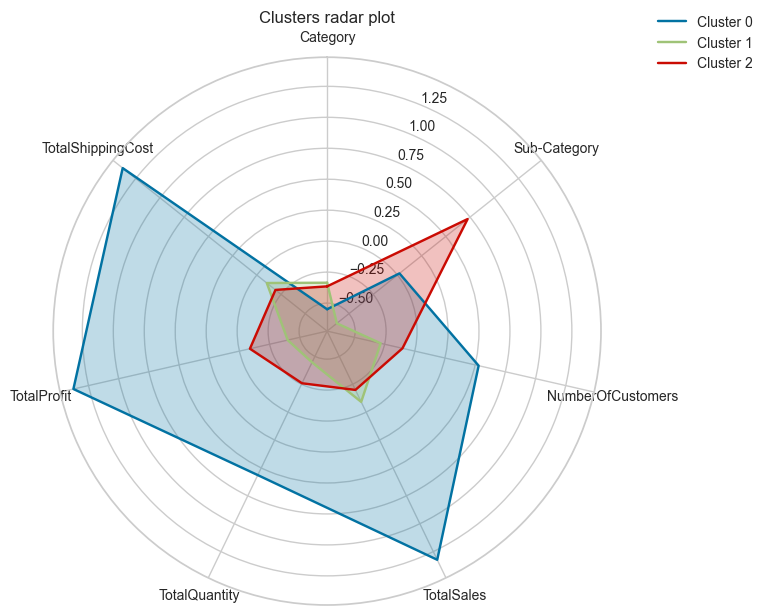

In [33]:
# Select variables to display in radar plot
variables = ['Category', 'Sub-Category', 'NumberOfCustomers', 'TotalSales',
       'TotalQuantity', 'TotalProfit', 'TotalShippingCost']

plot_radar(df_agg, variables)

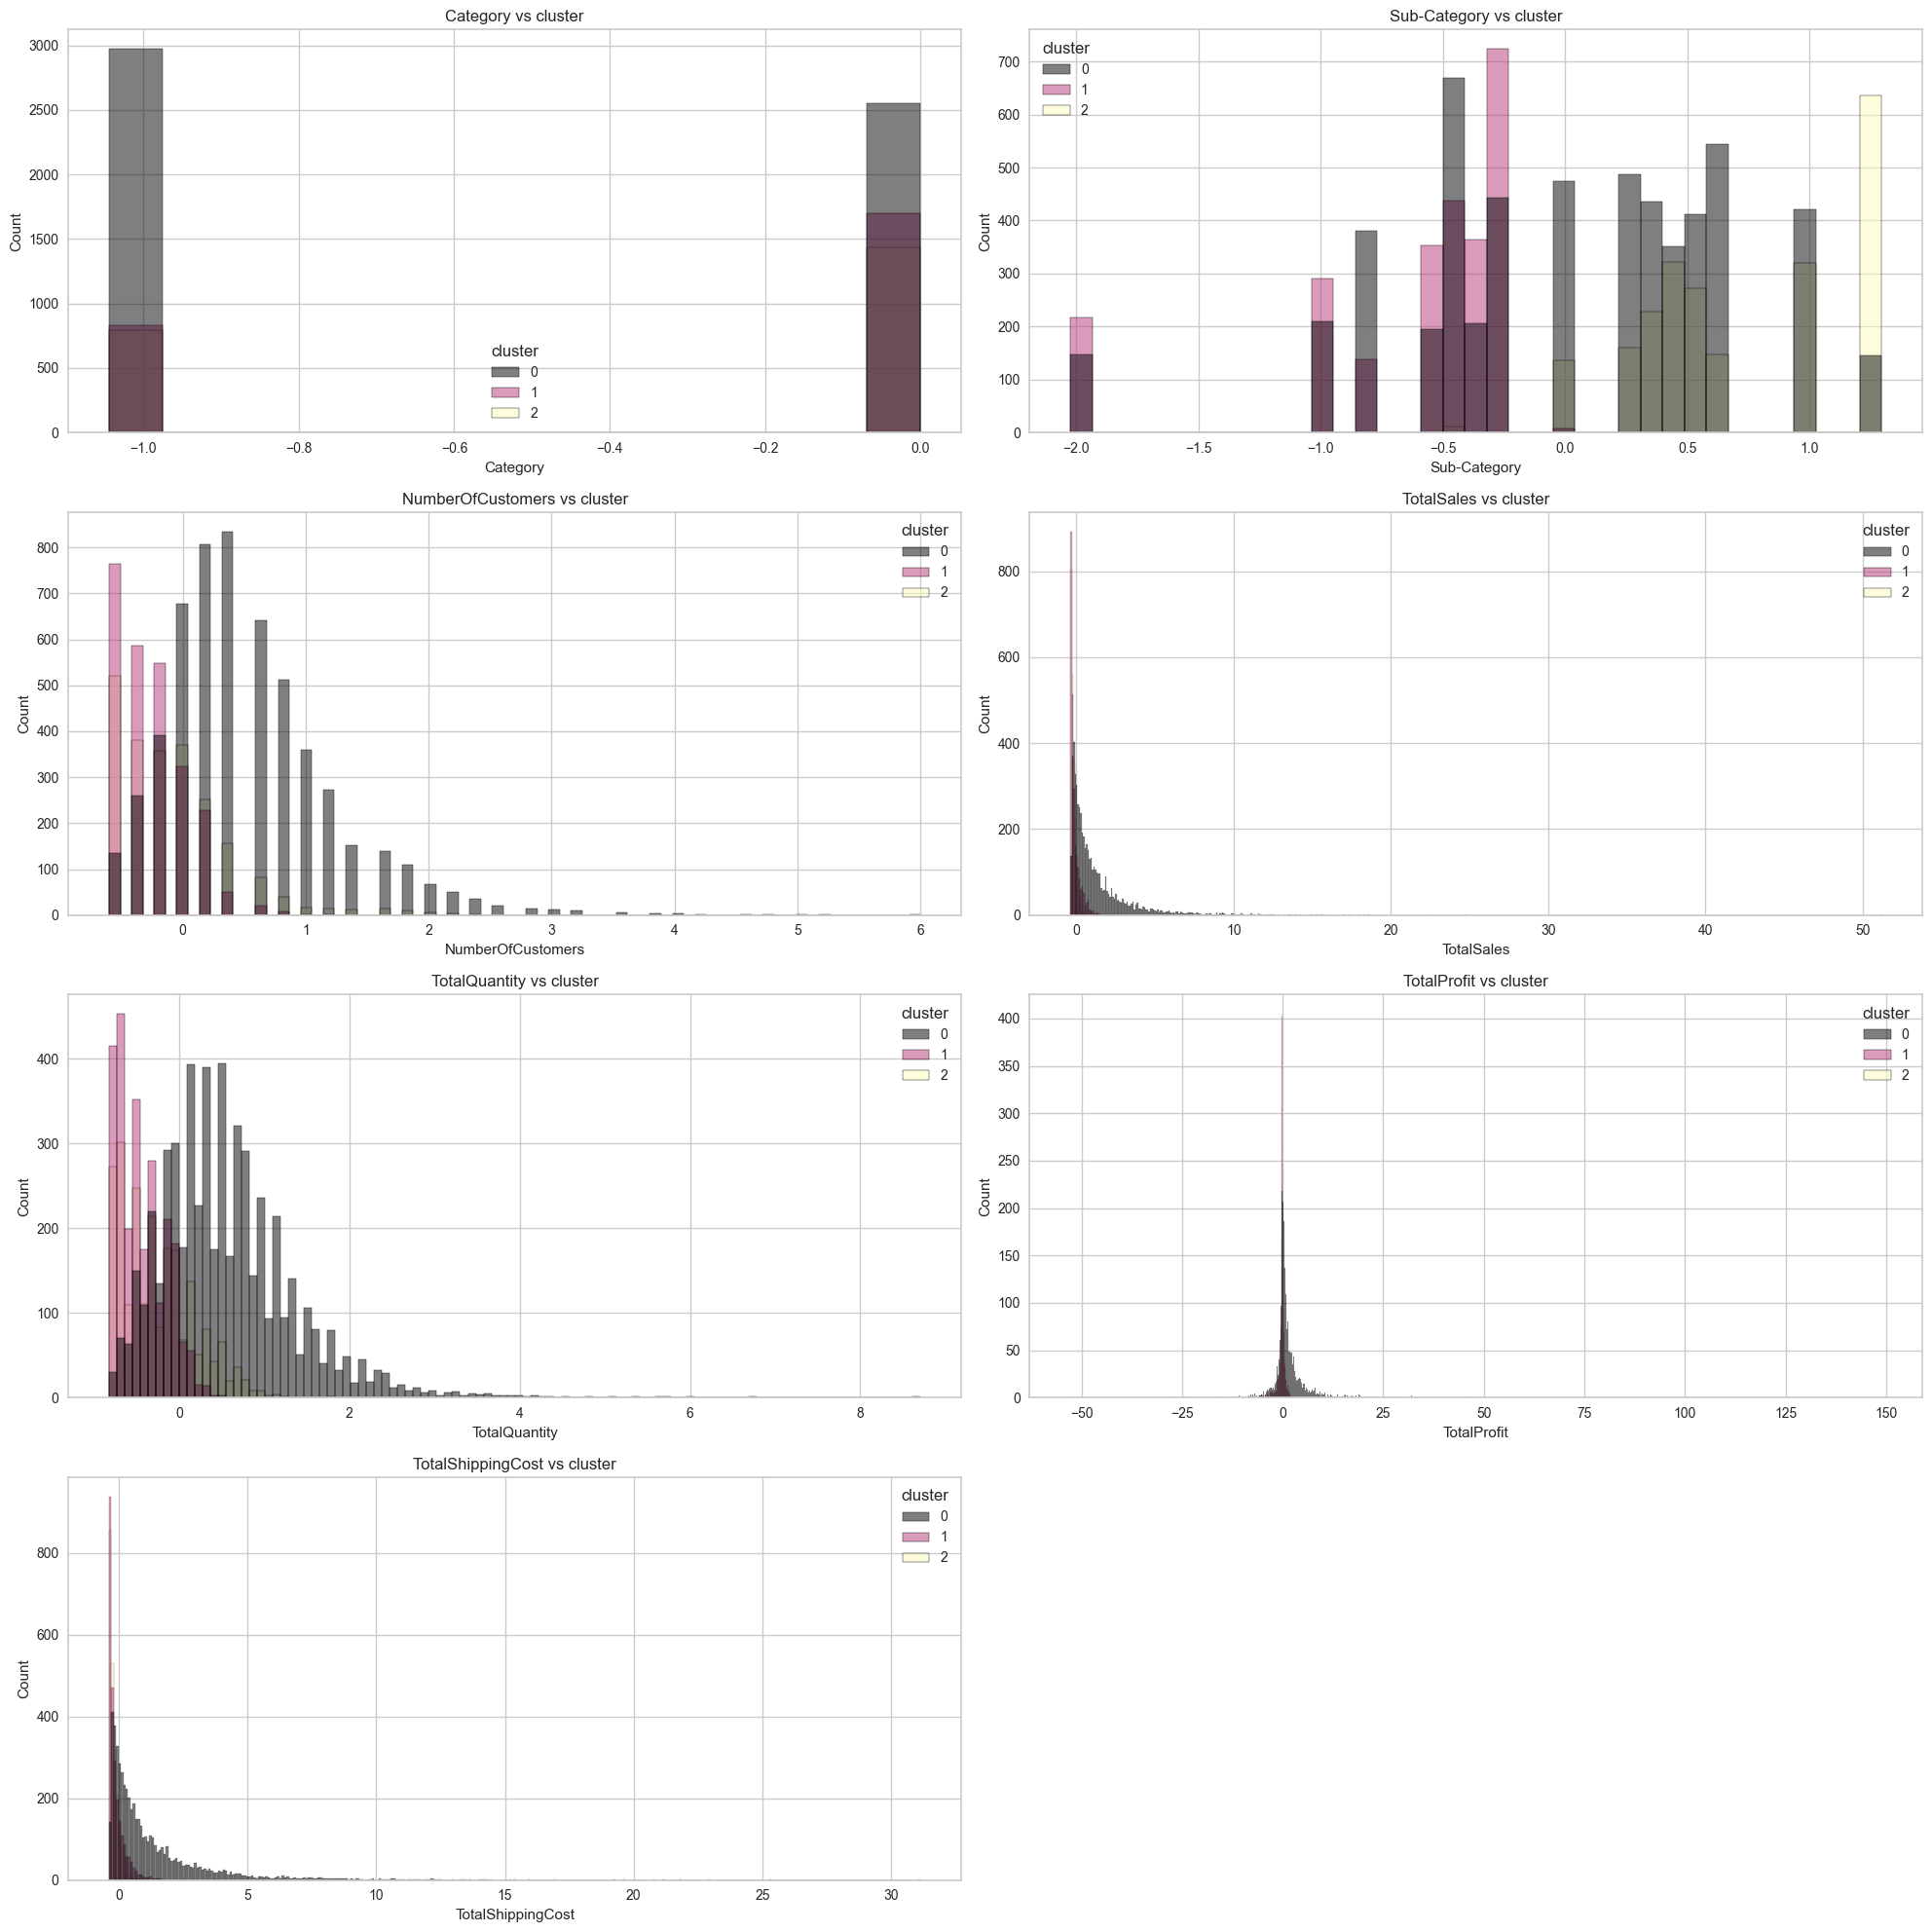

In [34]:
plot_relation_tv(df_agg, 'cluster', size=(20,20), n_cols = 2)

## Spectral clustering

This method takes a long time to run on this dataset, so we will discard it for now.

## DBSCAN Clustering

In [45]:
dbscan_methods(df_scaled, eps_values=[0.1, 1, 10, 20], min_samples_values=[3, 5, 10, 15])

eps  min_samples  silhouette_score  davies_bouldin_score  \
12  20.0            3          0.960696              1.882380   
13  20.0            5          0.960696              1.882380   
14  20.0           10          0.954845              1.307462   
15  20.0           15          0.945259              0.957931   
8   10.0            3          0.939218              0.760270   
9   10.0            5          0.939218              0.760270   
10  10.0           10          0.931132              1.182855   
11  10.0           15          0.928065              1.430098   
7    1.0           15          0.129909              1.880681   
6    1.0           10          0.100343              2.039984   
5    1.0            5          0.047709              2.450248   
4    1.0            3          0.036048              2.539211   
2    0.1           10         -0.408208              1.429450   
3    0.1           15         -0.418926              1.416315   
0    0.1            3         -0.425199              1.462998   
1    0.1            5         -0.431979              1.470796   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cardinality  
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     {-1: 2, 0: 10290}  
13                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     {-1: 2, 0: 10290}  
14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

After testing multiple combinations of `epsilon` and `min_samples`, we concluded that the only clusterings with acceptable metrics are two-group clusters, with one of the groups being extremely small.  

This is not necessarily a bad thing; it is possible that there is some real meaning behind this clustering, so we could explore it further in the future.  

For now, we will discard the DBSCAN method for clustering.